In [1]:
!pip install scikit-learn

You should consider upgrading via the 'c:\python\python36\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate
import seaborn as sns


In [3]:
df_raw = pd.read_csv("./data/house_data.csv")

In [4]:
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
def function_to_pair_plot(df):
    plt.figure(dpi=120)
    sns.pairplot(df)
    plt.show()

In [8]:
df = df_raw.loc[ : , df_raw.columns != 'Price']
df_sample = df.sample(n = 10000)

In [9]:
df_sample_full = df_raw.sample(n = 10000)

<Figure size 720x480 with 0 Axes>

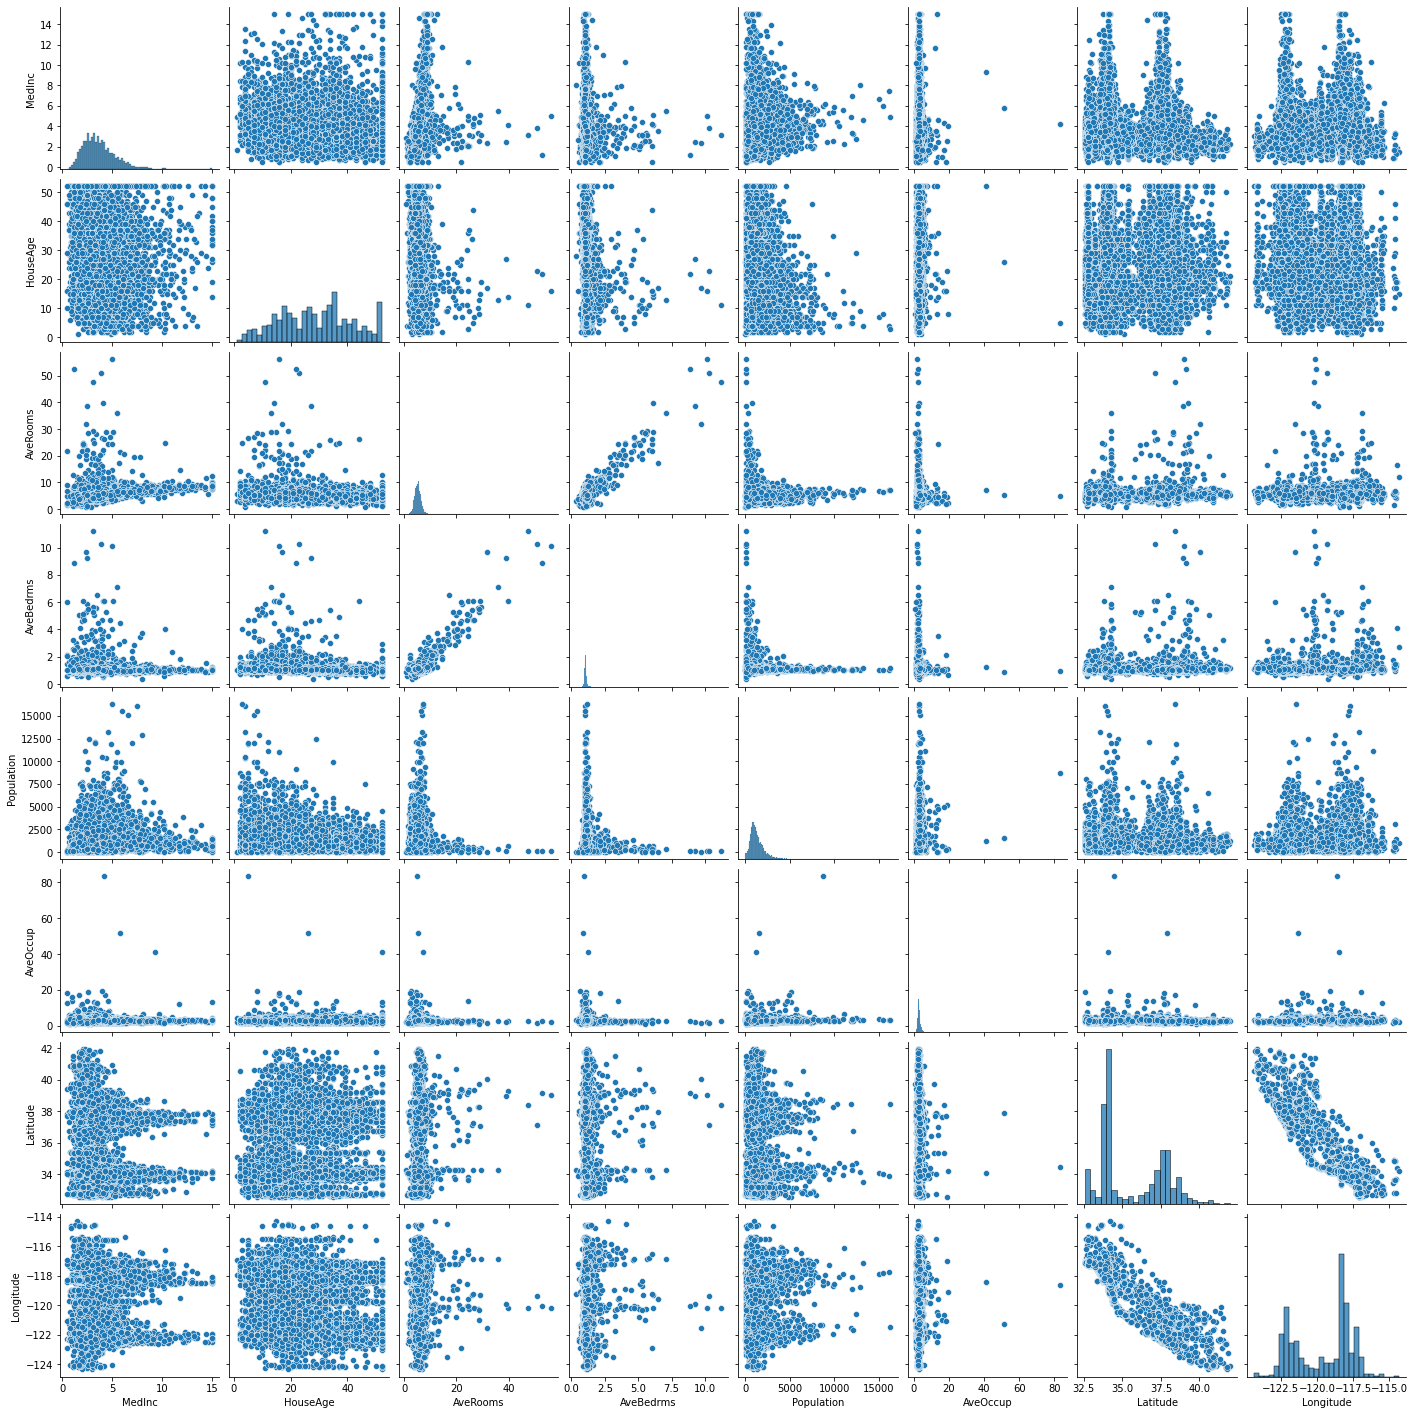

In [10]:
function_to_pair_plot(df_sample)

Average bedroom and Average room seem covariated with each other (positively)

There are some outliers with avg room, avg bedroom, avg occuppation. 

Long and Lat are covariated with each other (negatively)

In [11]:
def function_to_pair_plot_kde(df):
    plt.figure(dpi=120)
    sns.pairplot(df, diag_kind="kde")
    plt.show()

<Figure size 720x480 with 0 Axes>

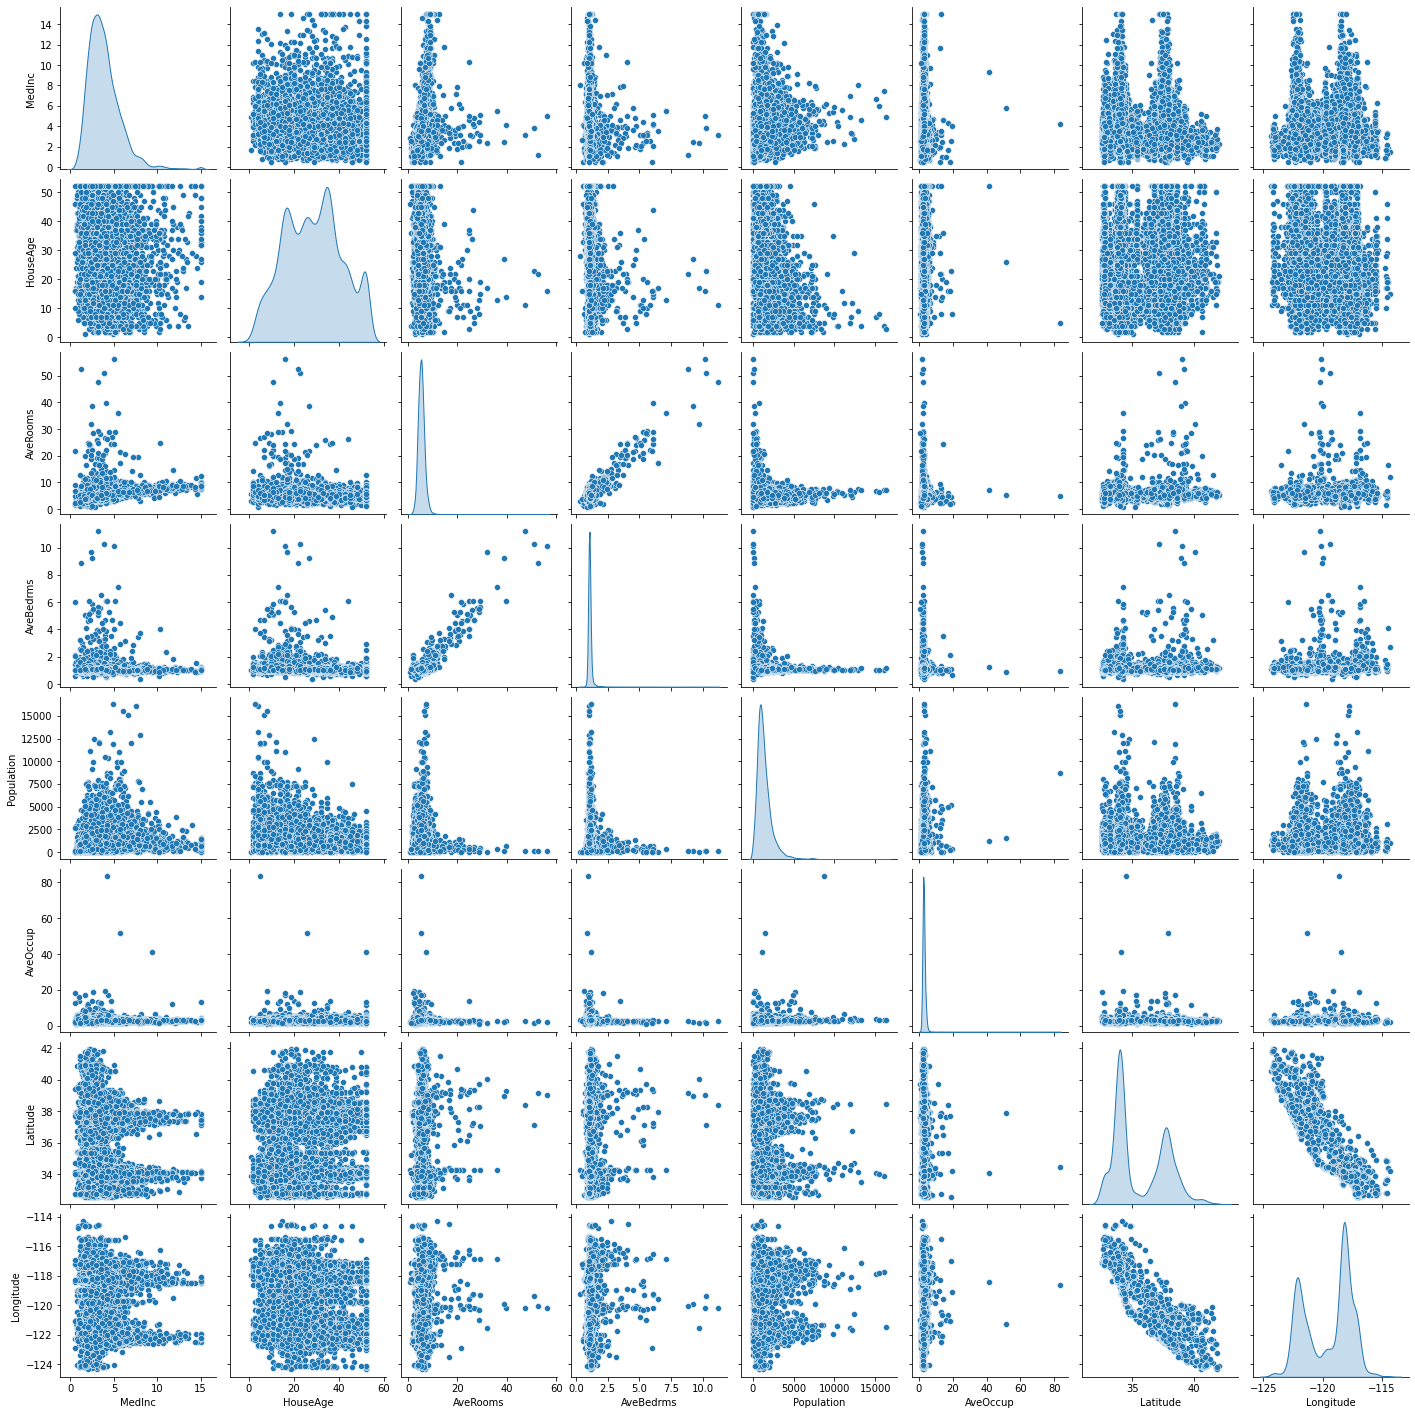

In [12]:
function_to_pair_plot_kde(df_sample)

In [13]:
def plot_heatmap(df):
    plt.figure(dpi = 120,figsize= (5,4))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90)
    plt.title('Correlation Heatmap')
    plt.show()

plot heatmap to ensure our inferences about correlation

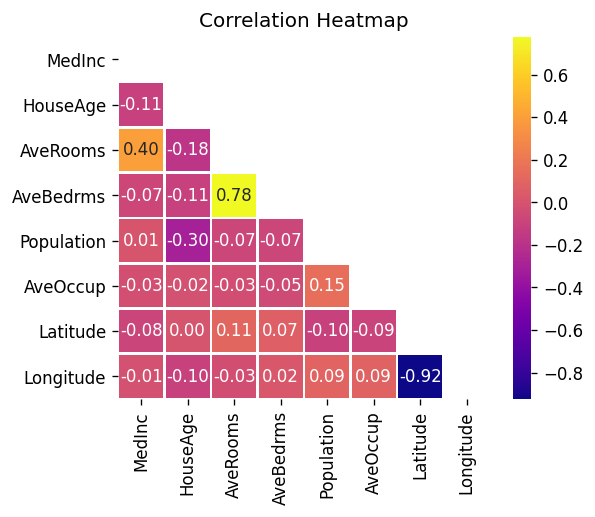

In [14]:
plot_heatmap(df_sample)

AvgOccupation are less likely to correlate (weak dependenece)
HouseAge and Population, MedInc are acceptable



We want to know the correlation between each attributes with Price

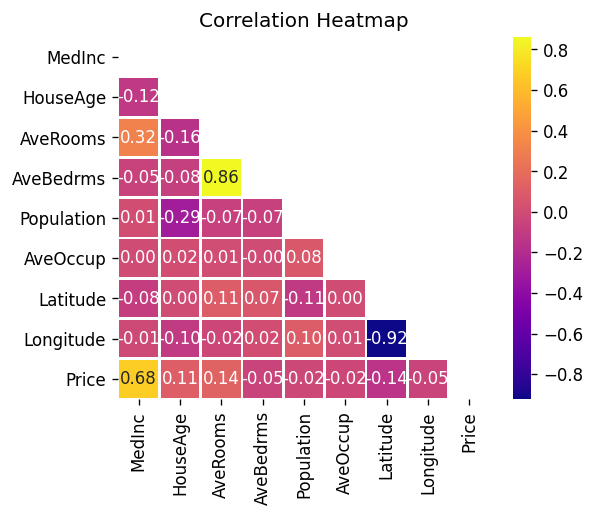

In [15]:
plot_heatmap(df_sample_full)

Median income seems to higly correlated with Price, it's supposed to be the most influential on Price



Median income with the rest 

Correlation between MedInc and HouseAge ==>  -0.11648330365734351


<Figure size 500x400 with 0 Axes>

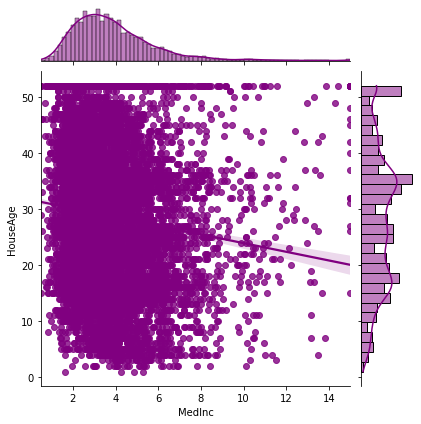

Correlation between MedInc and AveRooms ==>  0.31652178955353616


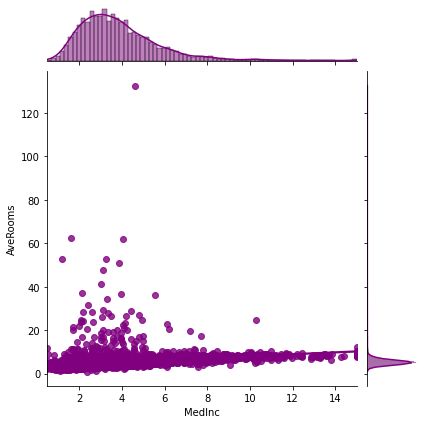

Correlation between MedInc and AveBedrms ==>  -0.05307604408314111


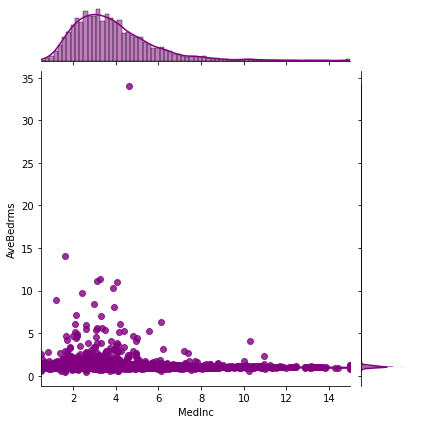

Correlation between MedInc and Population ==>  0.013673922436421883


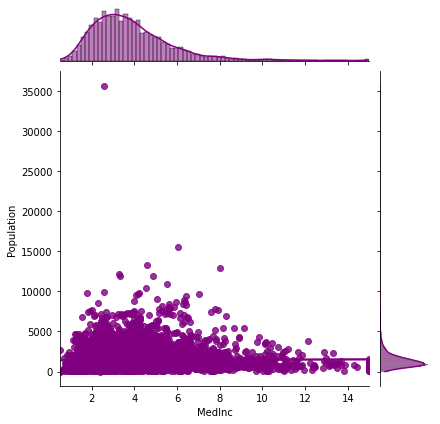

Correlation between MedInc and AveOccup ==>  0.00470551316452739


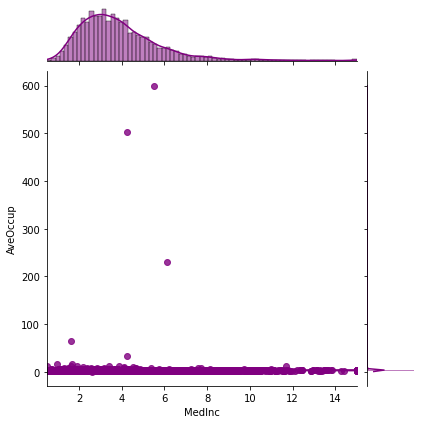

Correlation between MedInc and Latitude ==>  -0.08185510804201317


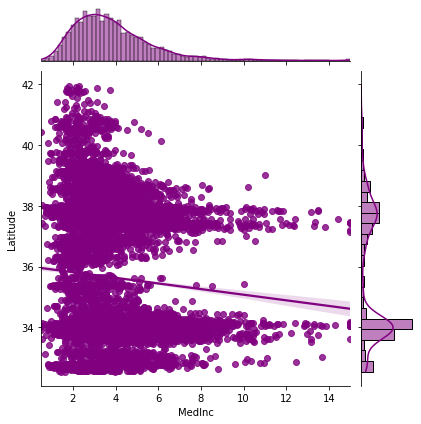

Correlation between MedInc and Longitude ==>  -0.013229892097910492


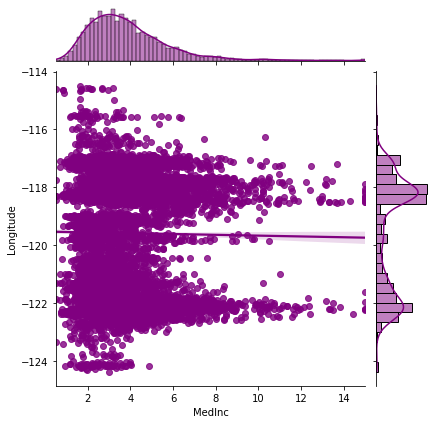

Correlation between MedInc and Price ==>  0.6839405571506408


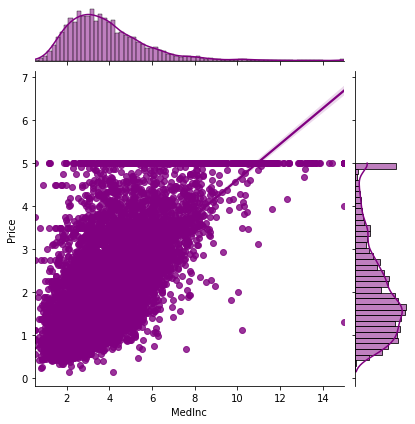

In [16]:
plt.figure(dpi = 100, figsize = (5,4))
print("Median income with the rest \n")
for i in  df_sample_full.columns:
    if i != 'MedInc':
        print(f"Correlation between MedInc and {i} ==> ",df_sample_full.corr().loc['MedInc'][i])
        sns.jointplot(x='MedInc',y=i,data=df_sample_full,kind = 'reg',color = 'purple')
        plt.show()

I still suspect on avg bedroom and avg room with Median income so it's reasonable to plot dependent line.

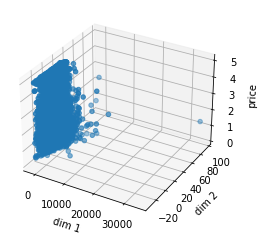

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = df_sample_full.loc[ : , df_sample_full.columns != 'Price']
y = df_sample_full.Price
pca.fit(x)

x_new = pca.transform(x)

xs = x_new[:,0]
ys = x_new[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=xs,ys=ys,zs=y)
ax.set_xlabel("dim 1")
ax.set_ylabel("dim 2")
ax.set_zlabel("price")
plt.show()

if we compute PCA, some outliers are detected though it's vague to find out anything new

Next we might want to remove these outliers based on pairplot above. It might help in transforming our data distribution under a normal one

In [18]:
df_sample_full = df_sample_full.drop(df_sample_full[df_sample_full.AveOccup > 1200].index,axis=0)

Correlation between MedInc and AveOccup ==>  0.00470551316452739


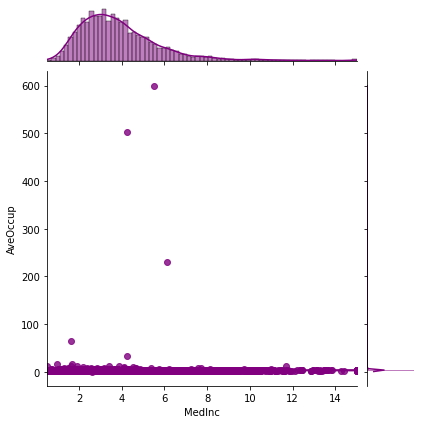

In [19]:
def draw_corr_between_two(df, attribute1, attribute2):
    print("Correlation between {} and {} ==> ".format(attribute1, attribute2),df.corr().loc[attribute1][attribute2])
    sns.jointplot(x=attribute1,y=attribute2,data=df,kind = 'reg',color = 'purple')
    plt.show()
draw_corr_between_two(df_sample_full, "MedInc", "AveOccup")

Try using natural log for MedInc.

In [20]:
import math
df_sample_full["LogMedInc"] = np.log(df_sample_full.MedInc)

In [21]:
df_sample_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,LogMedInc
18584,2.4053,21.0,4.945133,1.171681,2236.0,3.957522,36.93,-121.78,1.784,0.877675
1845,6.3538,49.0,6.293886,1.017751,1148.0,2.264300,37.90,-122.28,3.337,1.849053
40,2.0978,52.0,4.215190,1.060759,946.0,2.394937,37.83,-122.26,1.554,0.740889
19118,3.4500,52.0,5.573913,1.139130,910.0,2.637681,38.23,-122.65,2.006,1.238374
12562,3.0521,29.0,5.987234,1.127660,556.0,2.365957,38.54,-121.42,1.080,1.115830


Correlation between LogMedInc and AveOccup ==>  0.004183029310120552


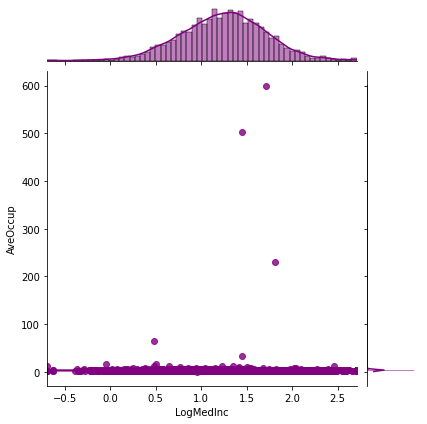

In [22]:
draw_corr_between_two(df_sample_full, "LogMedInc", "AveOccup")

It's slightly skew at left side

In [23]:
!pip install statsmodels

You should consider upgrading via the 'c:\python\python36\python.exe -m pip install --upgrade pip' command.


In [24]:
import statsmodels.api as sm
import pylab as py
import sys
import stat_util


In [25]:
def plot_qq(df, attribute):
    mean, var = stat_util.TrimmedMeanVar(df[attribute], p=0.01)
    std = math.sqrt(var)

    xs = [-4, 4]
    fxs, fys = stat_util.FitLine(xs, mean, std)
    plt.plot(fxs, fys, linewidth=4, color='grey')
    xs, ys = stat_util.NormalProbability(df[attribute])
    plt.plot(xs, ys)
    plt.show()


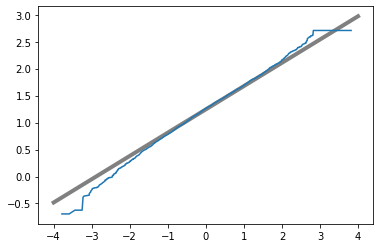

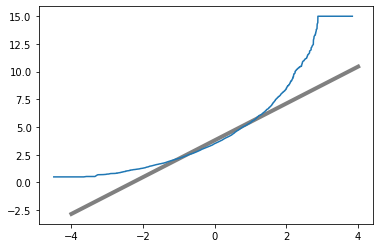

In [26]:
plot_qq(df_sample_full, 'LogMedInc')
plot_qq(df_sample_full, 'MedInc')

Let visualize qqplot for all attributes

MedInc


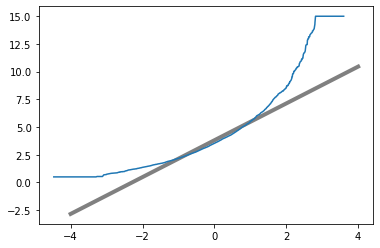

HouseAge


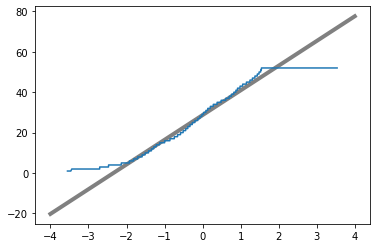

AveRooms


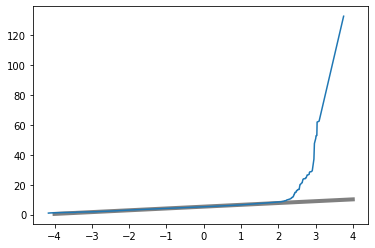

AveBedrms


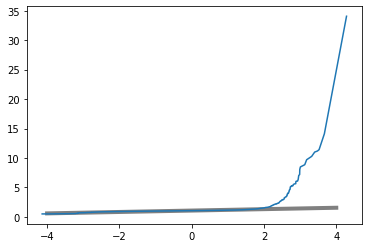

Population


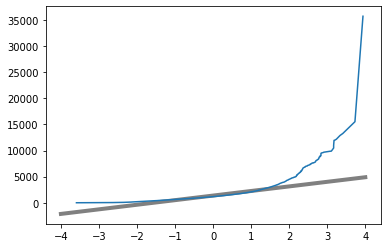

AveOccup


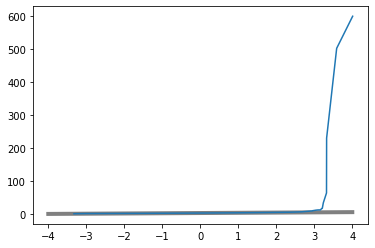

Latitude


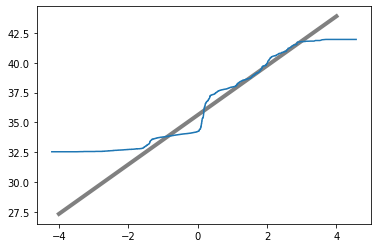

Longitude


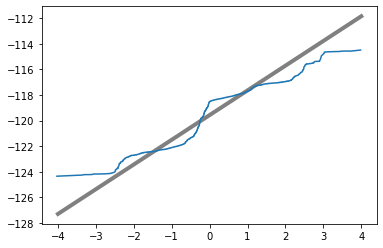

Price


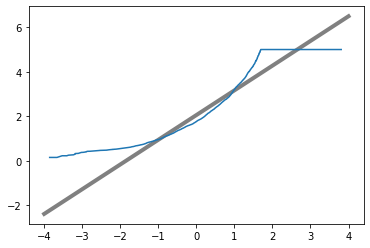

LogMedInc


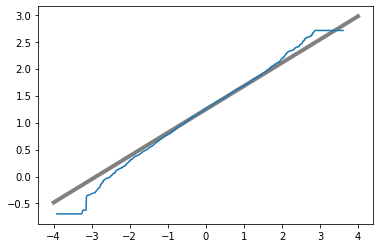

In [27]:
for attr in df_sample_full.columns:
    print(attr)
    plot_qq(df_sample_full, attr)

In [28]:
df_sample_full = df_sample_full[df_sample_full.Population < 20000]

Correlation between LogMedInc and LogPopulation ==>  0.05211694503529967


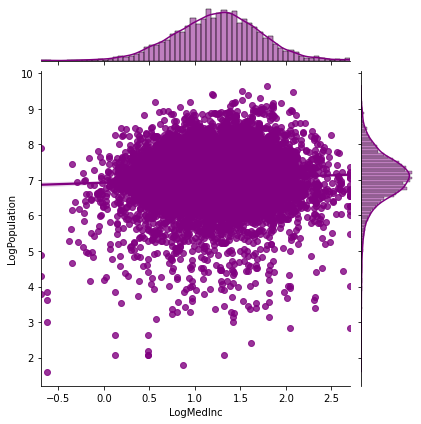

In [29]:
df_sample_full["LogPopulation"] = np.log(df_sample_full.Population)
draw_corr_between_two(df_sample_full, "LogMedInc", "LogPopulation")

Correlation between LogMedInc and Population ==>  0.044749454774917055


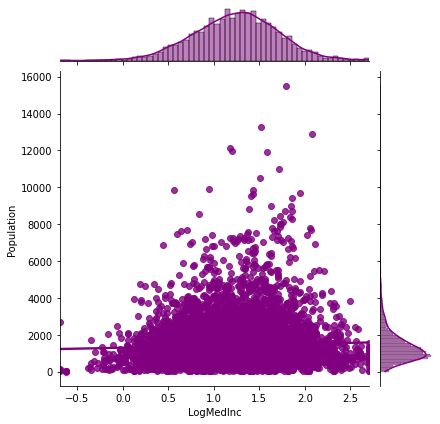

In [30]:
draw_corr_between_two(df_sample_full, "LogMedInc", "Population")

Correlation between LogMedInc and AveRooms ==>  0.30673482004253344


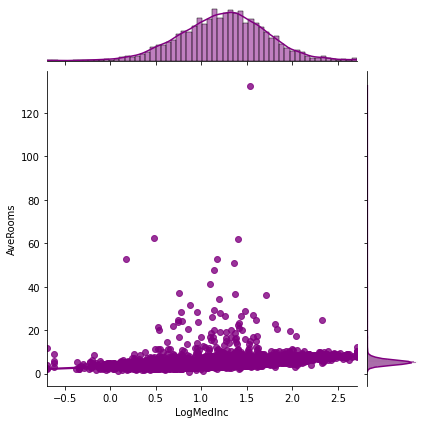

In [31]:
draw_corr_between_two(df_sample_full, "LogMedInc", "AveRooms")

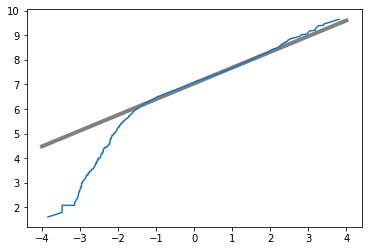

In [32]:
plot_qq(df_sample_full, "LogPopulation")

LogPopulation is likely transformed to normal distribution know but it increases the correlation with LogMedInc

To modify data well and validate the outliers, we should make some hypothesis testing between groups (attributes). Let write some code. We perform CI.

In [33]:
from scipy import stats

In [34]:
def statistic_numbers(distribution):
    """
    return:
    sample mean
    standard deviation
    z-score
    """
    # sns.histplot(data=distribution, kde=True)
    # plt.show()
    # sns.boxplot(distribution)
    # plt.show()
    return np.mean(distribution), stats.zscore(distribution)

In [35]:
meann, z_score = statistic_numbers(df_sample_full.LogPopulation)
meann, z_score

(7.024947835195184,
 array([ 0.92376877,  0.02798699, -0.23205914, ..., -1.04911308,
         0.01268439, -2.75212687]))

By ploting the boxplot and reconcile with qq plot above, the outlier lies in range [... ,5.5] and [8.5, ...]

In [36]:
# try sknewness:
skewness_medinc = stats.skew(df_sample_full.LogMedInc)
skewness_pop = stats.skew(df_sample_full.LogPopulation)
print(skewness_medinc)
print(skewness_pop)

-0.10219186373412567
-1.1110869330269277


LogPopulation is still not distributed as normality meanwhile LogMedInc is safely in normal distribution

In [37]:
def check_skewness(skewness):
    if abs(skewness) <0.5:
        return True 
    return False

In [81]:
def detect_outliers(df, attribute, normal):
    print(normal)
    outlier_index = []
    if normal == True:
        _, z_score = statistic_numbers(df[attribute])
        print(z_score.shape)
        for i in range(len(z_score)):
            if (z_score[i]) >3 or (z_score[i] < -3):
                outlier_index.append(i)
    else:
        cdf = stat_util.Cdf(df[attribute])
        Q1 = cdf.Percentile(25) 
        Q3 = cdf.Percentile(75) 
        IQR=Q3-Q1
        lowqe_bound=Q1 - 1.5 * IQR
        upper_bound=Q3 + 1.5 * IQR
        
        for i in range(len(df)):
            if (df[attribute].iloc[i] < lowqe_bound) | (df[attribute].iloc[i] > upper_bound) :
               outlier_index.append(i)

    return outlier_index


In [82]:
outlier_index_pop = detect_outliers(df_sample_full, 'LogPopulation', check_skewness(stats.skew(df_sample_full["LogPopulation"])))

False


In [68]:
outlier_index_medinc = detect_outliers(df_sample_full, "LogMedInc", check_skewness(stats.skew(df_sample_full["LogMedInc"])))

True
(9999,)


Now we got some outliers. We might want to check by removing these items in df_sample_full and make their histogram

In [87]:
df_sample_full_remove_outlier = df_sample_full.drop(df_sample_full.index[outlier_index_pop],axis=0)

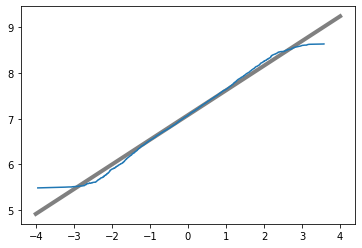

In [88]:
plot_qq(df_sample_full_remove_outlier, "LogPopulation")

Lol it's pretty good here. Check boxplot

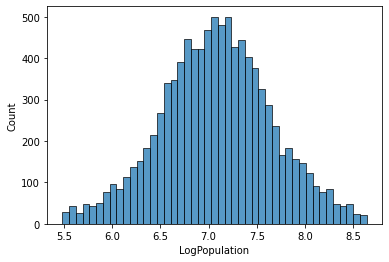

C:\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


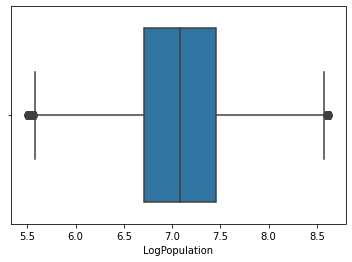

In [89]:
sns.histplot(df_sample_full_remove_outlier.LogPopulation)
plt.show()
sns.boxplot(df_sample_full_remove_outlier.LogPopulation)
plt.show()

Honestly I do not want to eliminate the outliers because the upcoming records which need to be predicted are outliers as well. So I will separate them between 2 different sets. One we train as usual, one we will take consideration late.

I'm still thinking if we should remove outliers or not, because log transform is such a way to make data distribute naturally. 

If we remove outliers before transforming data, it will be such a big problem.